In [1]:
#Importing libraries
import pandas as pd
import os
from pathlib import Path
import hvplot.pandas
from PIL import Image
from IPython.display import display

In [2]:
#Turning csv into a dataframe
earthquakes=pd.read_csv(
    "Significant_Earthquakes.csv",
    parse_dates=True,
    infer_datetime_format=True,
)
earthquakes

C:\Users\awhun\AppData\Local\Temp\ipykernel_12672\1699448076.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  earthquakes=pd.read_csv(


Unnamed: 0                      time  latitude  longitude    depth  \
0               0  1900-10-09T12:25:00.000Z   57.0900  -153.4800      NaN   
1               1  1901-03-03T07:45:00.000Z   36.0000  -120.5000      NaN   
2               2  1901-07-26T22:20:00.000Z   40.8000  -115.7000      NaN   
3               3  1901-12-30T22:34:00.000Z   52.0000  -160.0000      NaN   
4               4  1902-01-01T05:20:30.000Z   52.3800  -167.4500      NaN   
...           ...                       ...       ...        ...      ...   
99143       99143  2023-10-07T09:18:50.192Z   -5.4976   145.9875   71.373   
99144       99144  2023-10-07T08:40:11.980Z   -5.4981   146.1063   57.749   
99145       99145  2023-10-07T06:41:03.324Z   34.5954    61.9277   14.000   
99146       99146  2023-10-07T06:00:05.143Z   29.5125    81.2176   32.049   
99147       99147  2023-10-07T05:06:55.716Z   17.1172   -94.9407  107.735   

        mag magType    nst   gap   dmin  ...                   updated  \
0      7.86      mw    NaN   NaN    NaN  ...  2022-05-09T14:44:17.838Z   
1      6.40      ms    NaN   NaN    NaN  ...  2018-06-04T20:43:44.000Z   
2      5.00      fa    NaN   NaN    NaN  ...  2018-06-04T20:43:44.000Z   
3      7.00      ms    NaN   NaN    NaN  ...  2018-06-04T20:43:44.000Z   
4      7.00      ms    NaN   NaN    NaN  ...  2018-06-04T20:43:44.000Z   
...     ...     ...    ...   ...    ...  ...                       ...   
99143  5.50      mb  182.0  28.0  4.052  ...  2023-11-03T09:08:25.790Z   
99144  6.90     mww  271.0  19.0  6.151  ...  2023-11-01T06:08:50.058Z   
99145  6.30     mww  279.0  43.0  5.871  ...  2023-11-01T05:58:35.159Z   
99146  5.00      mb  112.0  46.0  3.956  ...  2023-11-01T05:46:06.836Z   
99147  5.90     mww  111.0  89.0  2.813  ...  2023-11-01T05:47:13.256Z   

                                      place        type horizontalError  \
0            16 km SW of Old Harbor, Alaska  earthquake             NaN   
1        12 km NNW of Parkfield, California  earthquake             NaN   
2                   6 km SE of Elko, Nevada  earthquake             NaN   
3                           south of Alaska  earthquake             NaN   
4            113 km ESE of Nikolski, Alaska  earthquake             NaN   
...                                     ...         ...             ...   
99143                                   NaN  earthquake            8.02   
99144  46 km SE of Madang, Papua New Guinea  earthquake            7.08   
99145  32 km NNE of Zindah Jān, Afghanistan  earthquake            8.37   
99146                                   NaN  earthquake            7.30   
99147        6 km WNW of Cuauhtémoc, Mexico  earthquake            8.83   

      depthError magError  magNst    status  locationSource  magSource  
0            NaN      NaN     NaN  reviewed           ushis         pt  
1            NaN      NaN     NaN  reviewed           ushis        ell  
2            NaN      NaN     NaN  reviewed           ushis        sjg  
3            NaN      NaN     NaN  reviewed           ushis        abe  
4            NaN      NaN     NaN  reviewed           ushis        abe  
...          ...      ...     ...       ...             ...        ...  
99143      6.209    0.037   253.0  reviewed              us         us  
99144      4.118    0.052    35.0  reviewed              us         us  
99145      1.820    0.048    41.0  reviewed              us         us  
99146      4.818    0.055   105.0  reviewed              us         us  
99147      7.435    0.032    91.0  reviewed              us         us  

[99148 rows x 23 columns]

In [3]:
#Turning earthquakes into dataframe
earthquakes_df=pd.DataFrame(earthquakes)
#Converting time column to datetime
earthquakes_df['time']=pd.to_datetime(earthquakes_df['time'])
#Creating new 'Decade' column
earthquakes_df['Decade']=(earthquakes_df['time'].dt.year//10)*10

display(earthquakes_df['Decade'])

0        1900
1        1900
2        1900
3        1900
4        1900
         ... 
99143    2020
99144    2020
99145    2020
99146    2020
99147    2020
Name: Decade, Length: 99148, dtype: int32

In [4]:
earthquakes_df['Decade'].value_counts(ascending=False)

Decade
2010    17748
2000    16693
1980    15434
1990    14227
1970    12503
2020     8701
1960     4068
1950     2760
1930     2519
1920     1822
1940     1537
1910      806
1900      330
Name: count, dtype: int64

In [5]:
#Dropping unnecessary columns
earthquakes_df.drop(columns=['nst','gap','dmin','type','horizontalError','depthError','magError','magNst','status','locationSource','magSource'],inplace=True)
earthquakes_df

Unnamed: 0                             time  latitude  longitude  \
0               0        1900-10-09 12:25:00+00:00   57.0900  -153.4800   
1               1        1901-03-03 07:45:00+00:00   36.0000  -120.5000   
2               2        1901-07-26 22:20:00+00:00   40.8000  -115.7000   
3               3        1901-12-30 22:34:00+00:00   52.0000  -160.0000   
4               4        1902-01-01 05:20:30+00:00   52.3800  -167.4500   
...           ...                              ...       ...        ...   
99143       99143 2023-10-07 09:18:50.192000+00:00   -5.4976   145.9875   
99144       99144 2023-10-07 08:40:11.980000+00:00   -5.4981   146.1063   
99145       99145 2023-10-07 06:41:03.324000+00:00   34.5954    61.9277   
99146       99146 2023-10-07 06:00:05.143000+00:00   29.5125    81.2176   
99147       99147 2023-10-07 05:06:55.716000+00:00   17.1172   -94.9407   

         depth   mag magType   rms    net          id  \
0          NaN  7.86      mw   NaN  ushis    ushis391   
1          NaN  6.40      ms   NaN  ushis    ushis393   
2          NaN  5.00      fa   NaN  ushis    ushis395   
3          NaN  7.00      ms   NaN  ushis    ushis397   
4          NaN  7.00      ms   NaN  ushis    ushis400   
...        ...   ...     ...   ...    ...         ...   
99143   71.373  5.50      mb  0.67     us  us6000ldsf   
99144   57.749  6.90     mww  0.57     us  us6000ldqf   
99145   14.000  6.30     mww  0.57     us  us6000ldpg   
99146   32.049  5.00      mb  0.41     us  us6000ldp9   
99147  107.735  5.90     mww  0.76     us  us6000ldny   

                        updated                                 place  Decade  
0      2022-05-09T14:44:17.838Z        16 km SW of Old Harbor, Alaska    1900  
1      2018-06-04T20:43:44.000Z    12 km NNW of Parkfield, California    1900  
2      2018-06-04T20:43:44.000Z               6 km SE of Elko, Nevada    1900  
3      2018-06-04T20:43:44.000Z                       south of Alaska    1900  
4      2018-06-04T20:43:44.000Z        113 km ESE of Nikolski, Alaska    1900  
...                         ...                                   ...     ...  
99143  2023-11-03T09:08:25.790Z                                   NaN    2020  
99144  2023-11-01T06:08:50.058Z  46 km SE of Madang, Papua New Guinea    2020  
99145  2023-11-01T05:58:35.159Z  32 km NNE of Zindah Jān, Afghanistan    2020  
99146  2023-11-01T05:46:06.836Z                                   NaN    2020  
99147  2023-11-01T05:47:13.256Z        6 km WNW of Cuauhtémoc, Mexico    2020  

[99148 rows x 13 columns]

In [6]:
#Listing columns to make reading list of columns easier
earthquakes_df.dtypes

Unnamed: 0                  int64
time          datetime64[ns, UTC]
latitude                  float64
longitude                 float64
depth                     float64
mag                       float64
magType                    object
rms                       float64
net                        object
id                         object
updated                    object
place                      object
Decade                      int32
dtype: object

In [7]:
#Dropping more columns
earthquakes_df.drop(columns=['rms','net','id','updated','magType','place'], inplace=True)
earthquakes_df

Unnamed: 0                             time  latitude  longitude  \
0               0        1900-10-09 12:25:00+00:00   57.0900  -153.4800   
1               1        1901-03-03 07:45:00+00:00   36.0000  -120.5000   
2               2        1901-07-26 22:20:00+00:00   40.8000  -115.7000   
3               3        1901-12-30 22:34:00+00:00   52.0000  -160.0000   
4               4        1902-01-01 05:20:30+00:00   52.3800  -167.4500   
...           ...                              ...       ...        ...   
99143       99143 2023-10-07 09:18:50.192000+00:00   -5.4976   145.9875   
99144       99144 2023-10-07 08:40:11.980000+00:00   -5.4981   146.1063   
99145       99145 2023-10-07 06:41:03.324000+00:00   34.5954    61.9277   
99146       99146 2023-10-07 06:00:05.143000+00:00   29.5125    81.2176   
99147       99147 2023-10-07 05:06:55.716000+00:00   17.1172   -94.9407   

         depth   mag  Decade  
0          NaN  7.86    1900  
1          NaN  6.40    1900  
2          NaN  5.00    1900  
3          NaN  7.00    1900  
4          NaN  7.00    1900  
...        ...   ...     ...  
99143   71.373  5.50    2020  
99144   57.749  6.90    2020  
99145   14.000  6.30    2020  
99146   32.049  5.00    2020  
99147  107.735  5.90    2020  

[99148 rows x 7 columns]

In [8]:
#Rounding latitude and longitude to two decimal places
earthquakes_df['latitude']=round(earthquakes_df['latitude'],2)
earthquakes_df['longitude']=round(earthquakes_df['longitude'],2)
earthquakes_df

Unnamed: 0                             time  latitude  longitude  \
0               0        1900-10-09 12:25:00+00:00     57.09    -153.48   
1               1        1901-03-03 07:45:00+00:00     36.00    -120.50   
2               2        1901-07-26 22:20:00+00:00     40.80    -115.70   
3               3        1901-12-30 22:34:00+00:00     52.00    -160.00   
4               4        1902-01-01 05:20:30+00:00     52.38    -167.45   
...           ...                              ...       ...        ...   
99143       99143 2023-10-07 09:18:50.192000+00:00     -5.50     145.99   
99144       99144 2023-10-07 08:40:11.980000+00:00     -5.50     146.11   
99145       99145 2023-10-07 06:41:03.324000+00:00     34.60      61.93   
99146       99146 2023-10-07 06:00:05.143000+00:00     29.51      81.22   
99147       99147 2023-10-07 05:06:55.716000+00:00     17.12     -94.94   

         depth   mag  Decade  
0          NaN  7.86    1900  
1          NaN  6.40    1900  
2          NaN  5.00    1900  
3          NaN  7.00    1900  
4          NaN  7.00    1900  
...        ...   ...     ...  
99143   71.373  5.50    2020  
99144   57.749  6.90    2020  
99145   14.000  6.30    2020  
99146   32.049  5.00    2020  
99147  107.735  5.90    2020  

[99148 rows x 7 columns]

In [9]:
#Displaying GeoMap of Earthquakes
map_of_earthquakes=earthquakes_df.hvplot.points(
    'longitude',
    'latitude',
    geo=True,
    color='depth',
    size='mag',
    alpha=5,
    tiles='ESRI',
    global_extent=True,
    frame_width = 700,
    frame_height = 500,
    )

map_of_earthquakes

C:\Users\awhun\anaconda3\anaconda\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [longitude,latitude]   (depth,mag)

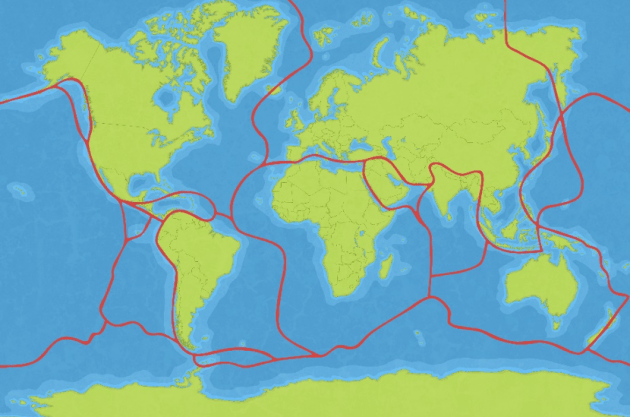

In [10]:
#Printing image of tectonic plate
img1 = Image.open('tp2.png')
display(img1)

In [11]:
earthquakes_df.head()

Unnamed: 0                      time  latitude  longitude  depth   mag  \
0           0 1900-10-09 12:25:00+00:00     57.09    -153.48    NaN  7.86   
1           1 1901-03-03 07:45:00+00:00     36.00    -120.50    NaN  6.40   
2           2 1901-07-26 22:20:00+00:00     40.80    -115.70    NaN  5.00   
3           3 1901-12-30 22:34:00+00:00     52.00    -160.00    NaN  7.00   
4           4 1902-01-01 05:20:30+00:00     52.38    -167.45    NaN  7.00   

   Decade  
0    1900  
1    1900  
2    1900  
3    1900  
4    1900

In [12]:
earthquakes_df.drop(columns=['time','latitude','longitude'], inplace=True)
earthquakes_df

Unnamed: 0    depth   mag  Decade
0               0      NaN  7.86    1900
1               1      NaN  6.40    1900
2               2      NaN  5.00    1900
3               3      NaN  7.00    1900
4               4      NaN  7.00    1900
...           ...      ...   ...     ...
99143       99143   71.373  5.50    2020
99144       99144   57.749  6.90    2020
99145       99145   14.000  6.30    2020
99146       99146   32.049  5.00    2020
99147       99147  107.735  5.90    2020

[99148 rows x 4 columns]

<Axes: title={'center': 'Magnitude of Earthquakes from 1900 to present'}, xlabel='Decade', ylabel='Magnitude'>

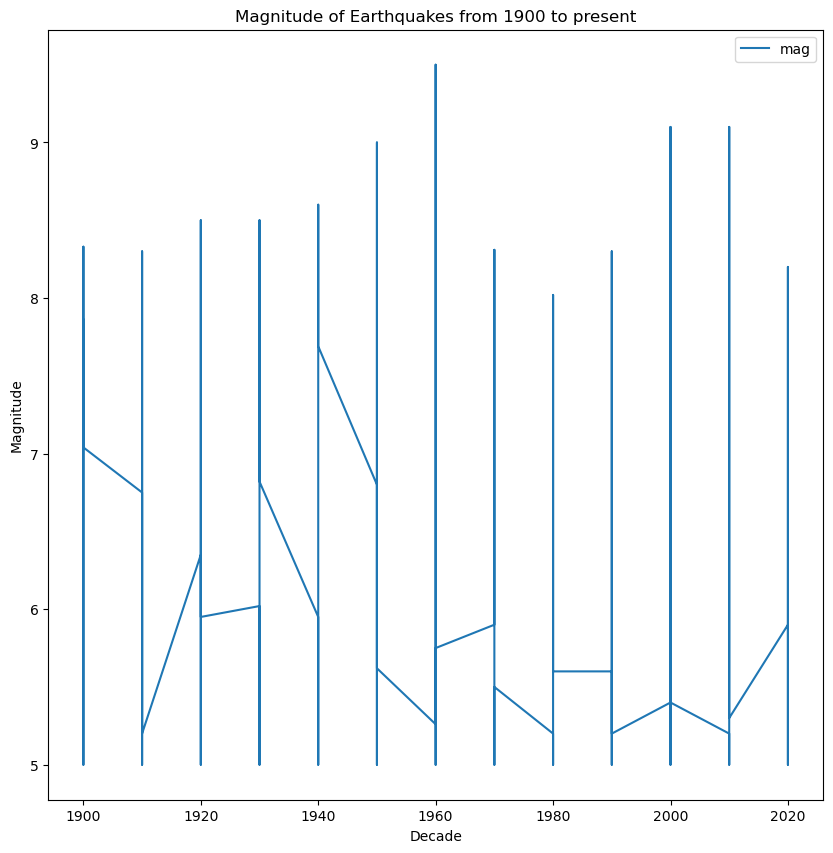

In [13]:
#Plotting by decade
earthquakes_df.plot.line(
    x='Decade',
    xlabel='Decade',
    y='mag',
    ylabel='Magnitude',
    title='Magnitude of Earthquakes from 1900 to present',
    figsize=(10,10),
)


In [18]:
#Grouping by decade and calculating average of magnitude
earthquakes_df.groupby('Decade').mean('mag')

Unnamed: 0      depth       mag
Decade                                 
1900         164.5  24.204452  6.522939
1910         732.5  24.305665  6.323089
1920        2046.5  22.154372  6.081158
1930        4217.0  21.927280  5.972759
1940        6245.0  23.933430  6.153650
1950        8393.5  29.483557  5.981004
1960       11807.5  49.608787  5.823513
1970       20093.0  80.284440  5.388001
1980       34061.5  82.107675  5.346947
1990       48892.0  74.130345  5.405914
2000       64352.0  58.006304  5.369936
2010       81572.5  54.815968  5.338497
2020       94797.0  54.304083  5.348413

<Axes: title={'center': 'Depth of Earthquakes from 1900 to present'}, xlabel='Decade', ylabel='Depth'>

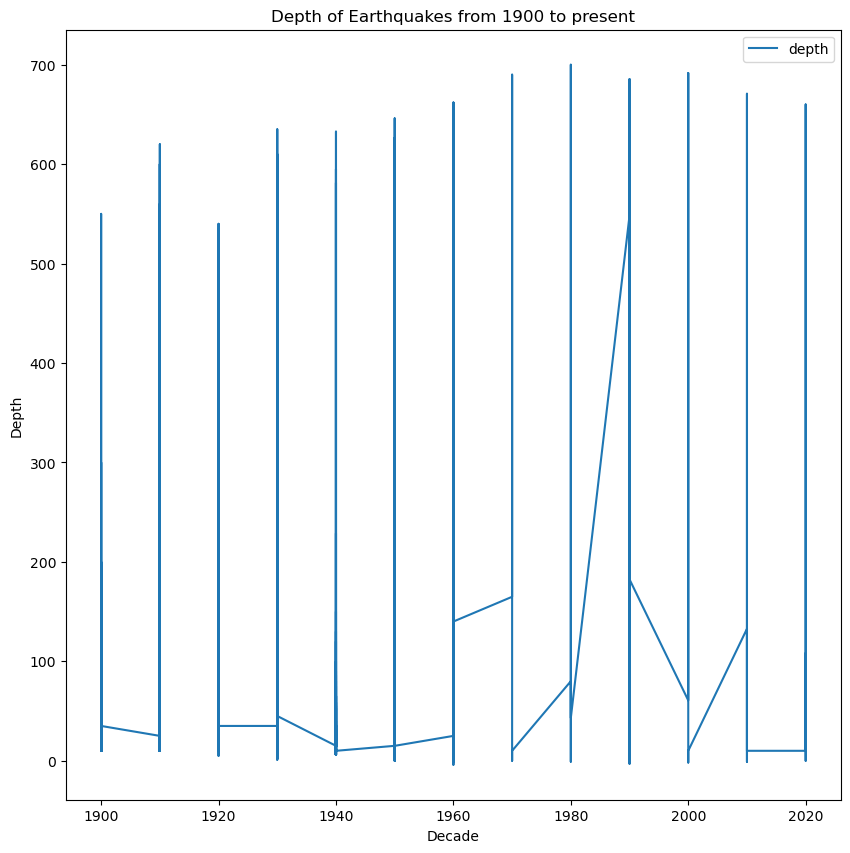

In [15]:
earthquakes_df.plot.line(
    x='Decade',
    xlabel='Decade',
    y='depth',
    ylabel='Depth',
    title='Depth of Earthquakes from 1900 to present',
    figsize=(10,10),
)

In [16]:
earthquakes_df.groupby('Decade').mean('depth')

Unnamed: 0      depth       mag
Decade                                 
1900         164.5  24.204452  6.522939
1910         732.5  24.305665  6.323089
1920        2046.5  22.154372  6.081158
1930        4217.0  21.927280  5.972759
1940        6245.0  23.933430  6.153650
1950        8393.5  29.483557  5.981004
1960       11807.5  49.608787  5.823513
1970       20093.0  80.284440  5.388001
1980       34061.5  82.107675  5.346947
1990       48892.0  74.130345  5.405914
2000       64352.0  58.006304  5.369936
2010       81572.5  54.815968  5.338497
2020       94797.0  54.304083  5.348413

<Axes: title={'center': 'Relation Between Magnitude and Depth'}, xlabel='Magnitude', ylabel='Depth'>

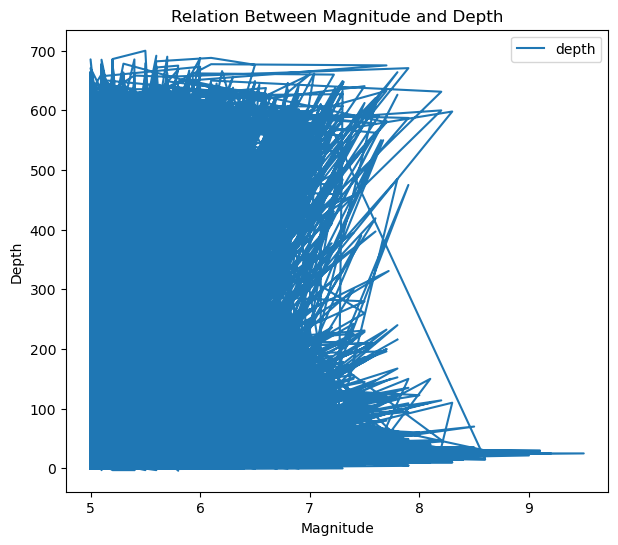

In [17]:
earthquakes_df.plot.line(
    x='mag',
    xlabel='Magnitude',
    y='depth',
    ylabel='Depth',
    title='Relation Between Magnitude and Depth',
    figsize=(7,6),
)